# RAI/USD vs ETH/USD, WIP

Compare RAI/USD and ETH/USD

In [1]:
import os
import time
from decimal import Decimal
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from web3 import Web3, HTTPProvider

from abis import ORACLE_RELAYER, ORACLE_RELAYER_ABI
from abis import FSM, FSM_ABI

from mp import fetch, fetch_link_mp, fetch_rp, fetch_fsm

size = 15
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,12),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}

plt.rcParams.update(params)

In [2]:
# Need an archive node
#ETH_RPC_URL=os.environ['ETH_RPC_URL']
ETH_RPC_URL='https://eth-mainnet.alchemyapi.io/v2/fnqkEt7-LptDIrq8uGem99usR6vUGqq7'
web3 = Web3(HTTPProvider(endpoint_uri=ETH_RPC_URL, request_kwargs={"timeout": 10}))

In [3]:
first_block = 14939000
interval = 1
num_blocks = None

latest_block = web3.eth.getBlock("latest")['number']

if not num_blocks:
    last_block = latest_block - 12
else:
    last_block = min(latest_block - 12, first_block + num_blocks)

print(f"first block {first_block}, last_block {last_block}")
blocks = list(range(first_block, last_block + 1, interval))

first block 14939000, last_block 14940939


In [4]:
start = time.time()
results = fetch(fetch_fsm, 8, FSM, FSM_ABI, ETH_RPC_URL, blocks=blocks)
print(f"took {time.time() - start}")

took 40.398902893066406


In [40]:
df = pd.DataFrame(results, columns = ['block', 'result', 'valid', 'next_result', 'next_valid'])
df = df[df['block'] >= 14939750]
df.info()
df = df[df['block'] < 14940000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190 entries, 750 to 1939
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   block        1190 non-null   int64 
 1   result       1190 non-null   object
 2   valid        1190 non-null   bool  
 3   next_result  1190 non-null   object
 4   next_valid   1190 non-null   bool  
dtypes: bool(2), int64(1), object(2)
memory usage: 39.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 750 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   block        250 non-null    int64 
 1   result       250 non-null    object
 2   valid        250 non-null    bool  
 3   next_result  250 non-null    object
 4   next_valid   250 non-null    bool  
dtypes: bool(2), int64(1), object(2)
memory usage: 8.3+ KB


In [41]:
df['block'].head(2)

750    14939750
751    14939751
Name: block, dtype: int64

In [42]:
df['block'].tail(2)

998    14939998
999    14939999
Name: block, dtype: int64

In [43]:

len(df['next_valid'])

250

In [44]:
df['result'] = df['result'].astype(float)
df['next_result'] = df['next_result'].astype(float)

<AxesSubplot:xlabel='block'>

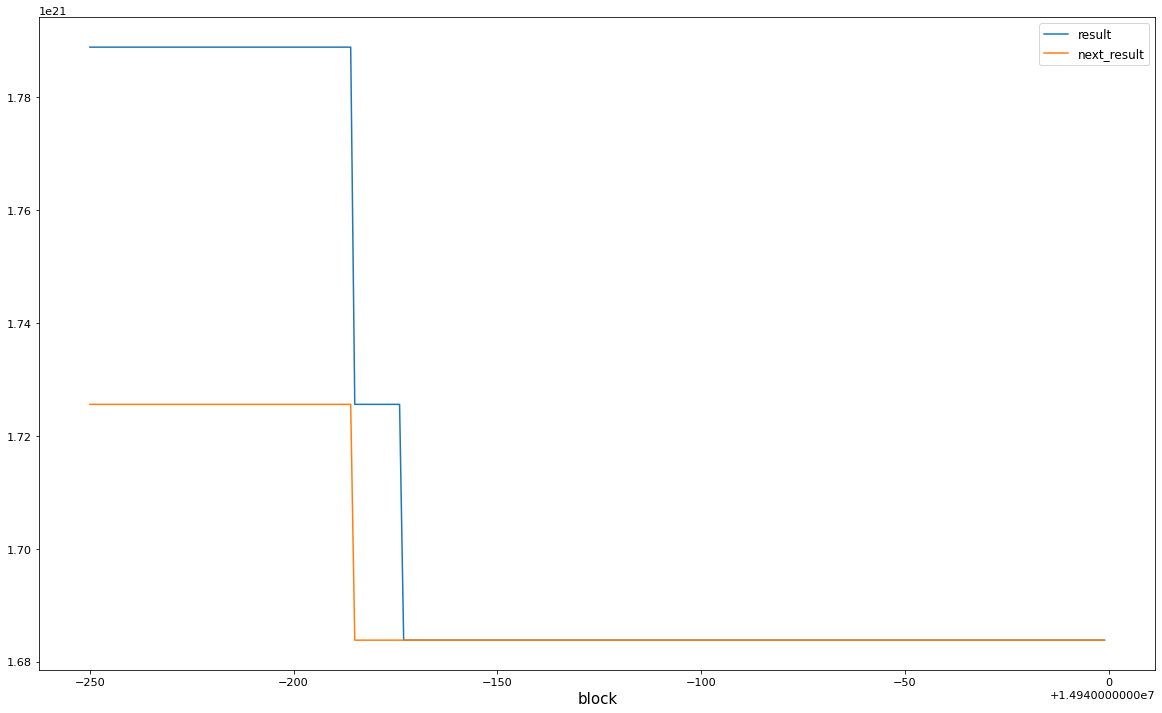

In [45]:
ax = df.plot(x='block', y='result')
df.plot(x='block', y='next_result', ax=ax)

In [46]:
rai_df.to_csv('redemption_price_1h_blocks.csv')

NameError: name 'rai_df' is not defined

In [ ]:
eth_df.to_csv('eth_usd_1h_blocks.csv')

Read existing csvs

In [ ]:
#rai_df = pd.read_csv('redemption_price_7d_blocks.csv')

In [ ]:
#eth_df = pd.read_csv('eth_usd_7d_blocks.csv')

In [ ]:
rai_df.head(4)

In [ ]:
rai_df['rai_ret'] = rai_df['price'].pct_change()
eth_df['eth_ret'] = eth_df['price'].pct_change()

In [ ]:
df = rai_df.merge(eth_df, on='block')

In [ ]:
df.info()

In [ ]:
df_final = df[['block', 'rai_ret', 'eth_ret']]

In [ ]:
df_final.info()

In [ ]:
df_final_index = df_final.set_index('block')

In [ ]:
df_final_index['rai_ret'].rolling(10).corr(df_final_index['eth_ret']).plot(title='Rolling 10-period correlation between 7d ETH/USD and 7d redemption price returns')



In [ ]:
rai_df['price_norm'] = (rai_df['price'] - min(rai_df['price'])) / (max(rai_df['price']) - min(rai_df['price']))
eth_df['price_norm'] = (eth_df['price'] - min(eth_df['price'])) / (max(eth_df['price']) - min(eth_df['price']))

In [ ]:
fig, ax = plt.subplots(1,1)
eth_df.plot(y='price_norm', x='block', ax=ax, label='Weekly eth/usd standardized', color='black')
rai_df.plot(y='price_norm', x='block', ax=ax, label='Weekly rai/usd standardized', color='blue')

In [ ]:
rai_df.plot(y='price_norm', x='block')

In [ ]:
'''
# https://stackoverflow.com/questions/33171413/cross-correlation-time-lag-correlation-with-pandas

lagged_correlation = pd.DataFrame.from_dict(
    {x: [df[target].corr(df[x].shift(-t)) for t in range(max_lag)] for x in df.columns})
'''

In [ ]:
df_final_index['rai_ret'].astype(float).corr(df_final_index['eth_ret'].shift(1))

In [ ]:
'''
# https://stackoverflow.com/questions/33171413/cross-correlation-time-lag-correlation-with-pandas

lagged_correlation = pd.DataFrame.from_dict(
    {x: [df[target].corr(df[x].shift(-t)) for t in range(max_lag)] for x in df.columns})
'''

In [ ]:
max_lag = 168
for x in range(max_lag):
    corr = df_final_index['rai_ret'].iloc[-24*30:].astype(float).corr(df_final_index['eth_ret'].iloc[-24*30:].shift(x))
    print(x, corr)
